In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd())) 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from datetime import datetime, timedelta

from src.constants import hustle_stats
from src.steps.model.model import CompositeEffort

pd.set_option('display.max_columns', None)

In [2]:
DATA_DIR = '../data/'
input_path = os.path.join(DATA_DIR, 'transformed_data', 'df_transformed.csv')
df_trans = pd.read_csv(input_path)
#lgl_path = os.path.join(DATA_DIR, 'df_logs.csv')
#input_path = os.path.join(DATA_DIR, 'transformed_data', 'df_transformed.csv')

# Read in Data
#df_logs = pd.read_csv(lgl_path)


In [4]:
# Features
features_to_exclude = ['CONTESTED_SHOTS','BOX_OUTS', 'SCREEN_AST_PTS', 'BOX_OUT_PLAYER_TEAM_REBS', 'LOOSE_BALLS_RECOVERED','BOX_OUT_PLAYER_REBS']
features = list(set(hustle_stats)-set(features_to_exclude))
home_features = [f"HOME_{feat}" for feat in features]
away_features = [f"AWAY_{feat}" for feat in features]
features = home_features + away_features
X = df_trans[features]
y = df_trans['HOME_NRtg']

In [5]:
df_trans.head()

,SEASON_ID,GAME_ID,GAME_DATE,AWAY_TEAM_ID,HOME_TEAM_ID,AWAY_TEAM_ABBREVIATION,HOME_TEAM_ABBREVIATION,AWAY_TEAM_NAME,HOME_TEAM_NAME,AWAY_FGM,HOME_FGM,AWAY_FGA,HOME_FGA,AWAY_FG3M,HOME_FG3M,AWAY_FG3A,HOME_FG3A,AWAY_FTM,HOME_FTM,AWAY_FTA,HOME_FTA,AWAY_OREB,HOME_OREB,AWAY_DREB,HOME_DREB,AWAY_AST,HOME_AST,AWAY_STL,HOME_STL,AWAY_BLK,HOME_BLK,AWAY_TOV,HOME_TOV,AWAY_PF,HOME_PF,AWAY_PTS,HOME_PTS,NEUTRAL_IND,AWAY_DEF_BOXOUTS,HOME_DEF_BOXOUTS,AWAY_CONTESTED_SHOTS,HOME_CONTESTED_SHOTS,AWAY_DEFLECTIONS,HOME_DEFLECTIONS,AWAY_CHARGES_DRAWN,HOME_CHARGES_DRAWN,AWAY_DEF_LOOSE_BALLS_RECOVERED,HOME_DEF_LOOSE_BALLS_RECOVERED,AWAY_SCREEN_AST_PTS,HOME_SCREEN_AST_PTS,AWAY_OFF_BOXOUTS,HOME_OFF_BOXOUTS,AWAY_BOX_OUT_PLAYER_TEAM_REBS,HOME_BOX_OUT_PLAYER_TEAM_REBS,AWAY_BOX_OUTS,HOME_BOX_OUTS,AWAY_BOX_OUT_PLAYER_REBS,HOME_BOX_OUT_PLAYER_REBS,AWAY_SCREEN_ASSISTS,HOME_SCREEN_ASSISTS,AWAY_LOOSE_BALLS_RECOVERED,HOME_LOOSE_BALLS_RECOVERED,AWAY_CONTESTED_SHOTS_3PT,HOME_CONTESTED_SHOTS_3PT,AWAY_CONTESTED_SHOTS_2PT,HOME_CONTESTED_SHOTS_2PT,AWAY_OFF_LOOSE_BALLS_RECOVERED,HOME_OFF_LOOSE_BALLS_RECOVERED,HOME_POSS,AWAY_POSS,HOME_ORtg,AWAY_ORtg,HOME_NRtg,AWAY_NRtg,SCREEN_AST_PTS_DIFF,DEFLECTIONS_DIFF,CONTESTED_SHOTS_DIFF,DEF_BOXOUTS_DIFF,CONTESTED_SHOTS_2PT_DIFF,BOX_OUT_PLAYER_TEAM_REBS_DIFF,CHARGES_DRAWN_DIFF,LOOSE_BALLS_RECOVERED_DIFF,OFF_BOXOUTS_DIFF,BOX_OUTS_DIFF,DEF_LOOSE_BALLS_RECOVERED_DIFF,SCREEN_ASSISTS_DIFF,BOX_OUT_PLAYER_REBS_DIFF,OFF_LOOSE_BALLS_RECOVERED_DIFF,CONTESTED_SHOTS_3PT_DIFF
0,22022,22200001,2022-10-18,1610612755,1610612738,PHI,BOS,Philadelphia 76ers,Boston Celtics,40,46,80,82,13,12,34,35,24,22,28,28,4,6,27,30,16,24,8,8,3,3,14,11,25,24,117,126,0,6,2,27,34,16,16,0,2,1,2,19,22,0,0,6,2,6,2,4,0,9,10,1,4,12,15,15,19,0,2,99.32,102.32,126.862666,114.347146,12.515520,-12.515520,3,0,7,-4,4,-4,2,3,0,-4,1,1,-4,2,3
1,22022,22200002,2022-10-18,1610612747,1610612744,LAL,GSW,Los Angeles Lakers,Golden State Warriors,40,45,94,99,10,16,40,45,19,17,25,23,9,11,39,37,23,31,12,11,4,4,22,18,18,23,109,123,0,11,11,71,63,18,22,1,1,2,2,8,43,2,3,13,12,13,14,7,6,3,18,7,3,36,33,35,30,5,1,116.12,118.00,105.924905,92.372881,13.552024,-13.552024,35,4,-8,0,-5,-1,0,-4,1,1,0,15,-1,-4,-3
2,22022,22200003,2022-10-19,1610612753,1610612765,ORL,DET,Orlando Magic,Detroit Pistons,42,40,86,94,11,14,30,38,14,19,19,24,10,12,38,29,21,31,5,11,5,4,18,13,24,21,109,113,0,12,11,60,59,11,15,0,0,1,4,26,19,2,1,11,10,14,12,6,4,10,8,6,8,26,19,34,40,5,4,105.56,102.36,107.048124,106.486909,0.561215,-0.561215,-7,4,-1,-1,6,-1,0,2,-1,-2,3,-2,-2,-1,-7
3,22022,22200004,2022-10-19,1610612764,1610612754,WAS,IND,Washington Wizards,Indiana Pacers,42,39,92,97,11,15,31,42,19,14,24,21,14,12,39,30,21,21,5,7,10,5,17,15,19,20,114,107,0,11,5,67,62,14,12,0,1,2,2,20,17,2,3,13,7,13,8,10,3,9,8,5,5,31,21,36,41,3,3,109.24,105.56,97.949469,107.995453,-10.045984,10.045984,-3,-2,-5,-6,5,-6,1,0,1,-5,0,-1,-7,0,-10
4,22022,22200005,2022-10-19,1610612745,1610612737,HOU,ATL,Houston Rockets,Atlanta Hawks,42,45,98,90,9,7,35,25,14,20,15,24,15,4,39,34,25,30,4,12,3,5,16,9,20,18,107,117,0,11,8,54,67,11,16,0,1,2,5,26,27,0,1,8,4,11,9,1,1,11,13,8,6,17,28,37,39,6,1,105.56,105.60,110.837438,101.325758,9.511681,-9.511681,1,5,13,-3,2,-4,1,-2,1,-2,3,2,0,-5,11


In [32]:
X_home = X[home_features]
X_away = X[away_features]
X_home.columns = X_home.columns.str.replace('HOME_','')
X_away.columns = X_away.columns.str.replace('AWAY_','')
X_new = pd.concat([X_home, X_away], ignore_index=True)
y_new = pd.concat([df_trans['HOME_NRtg'], df_trans['AWAY_NRtg']], ignore_index=True)

In [33]:
X_new.shape, y_new.shape

((1150, 9), (1150,))

In [35]:
y_new.isna().sum()

np.int64(0)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     8.124
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           9.35e-12
Time:                        18:00:04   Log-Likelihood:                -4604.0
No. Observations:                1150   AIC:                             9228.
Df Residuals:                    1140   BIC:                             9278.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

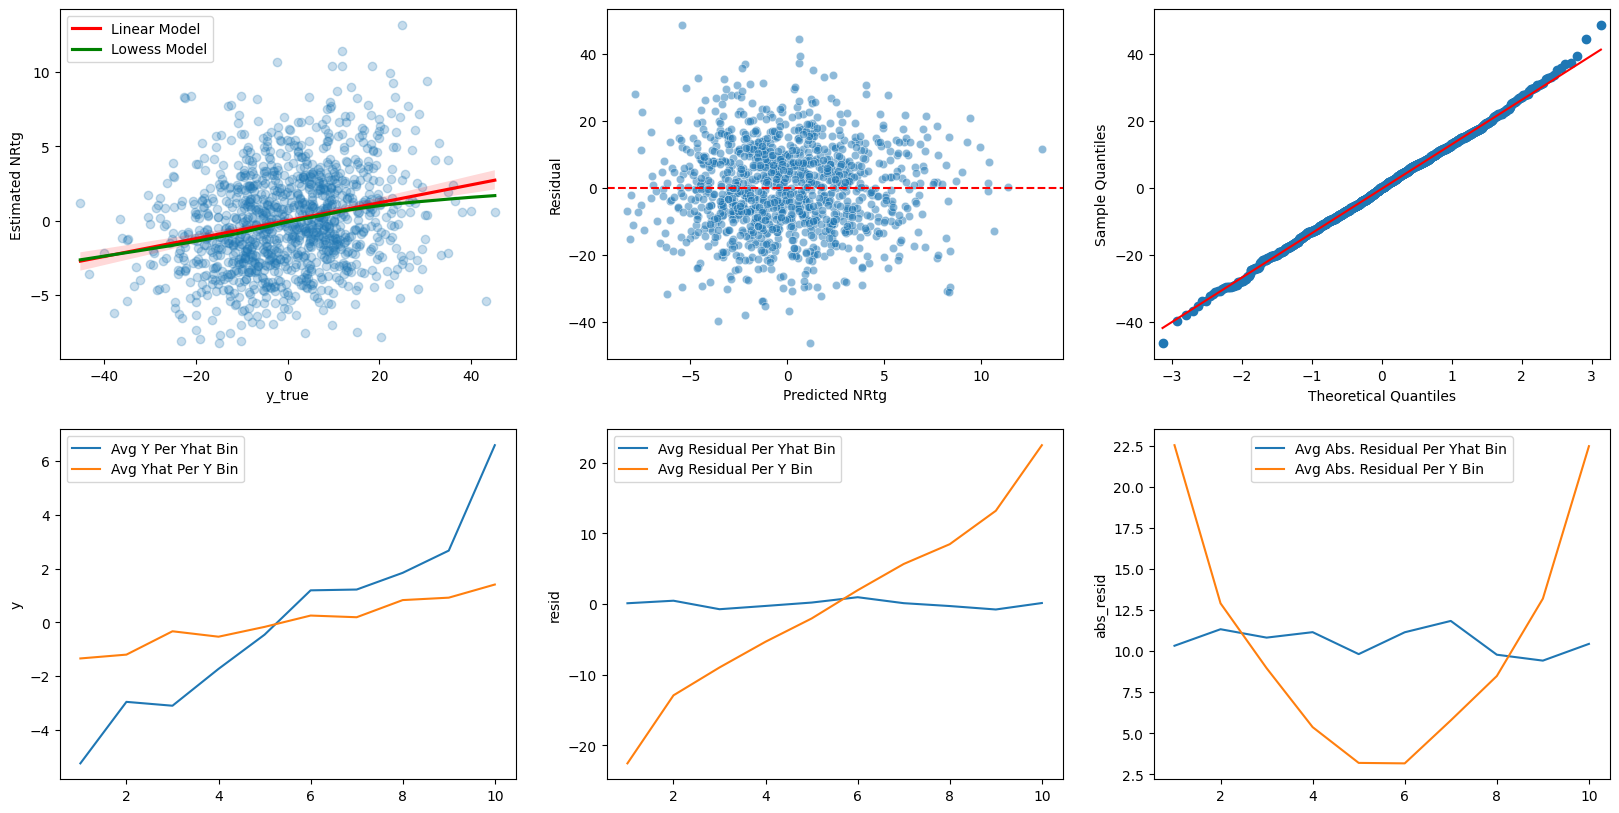

In [37]:
comp_eff_new = CompositeEffort(X=X_new, y=y_new)
model_new = comp_eff_new.estimate_stage1_model()

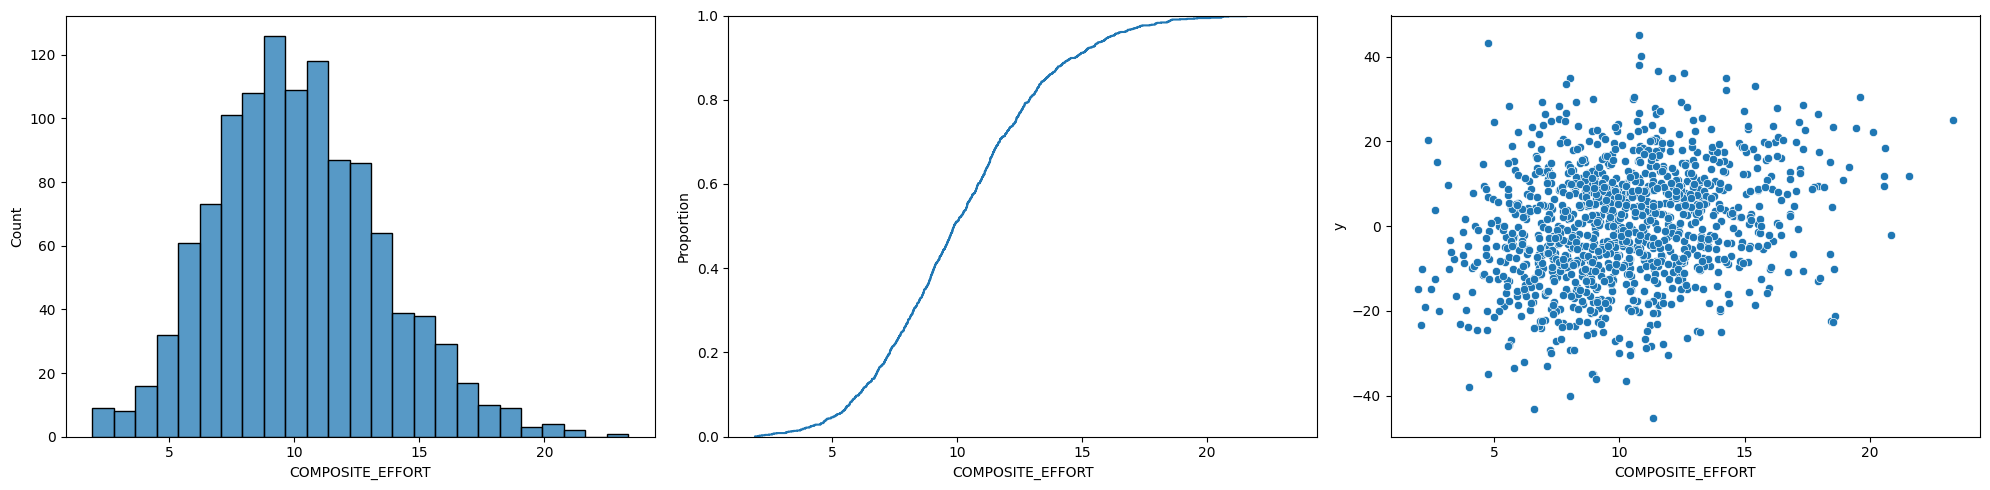

count    1150.000000
mean       10.187051
std         3.358716
min         1.929512
0.1%        2.070307
1%          3.197386
5%          5.161282
10%         6.091054
20%         7.321402
25%         7.829596
30%         8.268132
40%         9.089664
50%         9.884964
60%        10.848476
70%        11.701236
75%        12.353437
80%        12.897135
90%        14.724594
95%        16.122282
99%        18.591196
99.9%      21.482105
max        23.343188
Name: COMPOSITE_EFFORT, dtype: float64


Pearson Correlation:  0.245, P-value:  0.00000
Spearman Correlation:  0.240, P-value:  0.00000
Kendall's Tau Correlation:  0.161, P-value:  0.00000


In [38]:
output_dir_new = os.path.join(DATA_DIR, 'stage1_effort_new')
df_stage1_effort_new = comp_eff_new.estimate_composite_effort(output_dir=output_dir)

In [41]:
df_stage1_effort_new.head(2)

,CONTESTED_SHOTS_2PT,DEF_BOXOUTS,DEF_LOOSE_BALLS_RECOVERED,CHARGES_DRAWN,DEFLECTIONS,OFF_LOOSE_BALLS_RECOVERED,OFF_BOXOUTS,SCREEN_ASSISTS,CONTESTED_SHOTS_3PT,COMPOSITE_EFFORT
0,19,2,2,2,16,2,0,10,15,8.741128
1,30,11,2,1,22,1,3,18,33,17.222305


                            OLS Regression Results                            
Dep. Variable:              HOME_NRtg   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     5.980
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           2.42e-13
Time:                        17:36:19   Log-Likelihood:                -2251.9
No. Observations:                 575   AIC:                             4542.
Df Residuals:                     556   BIC:                             4624.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

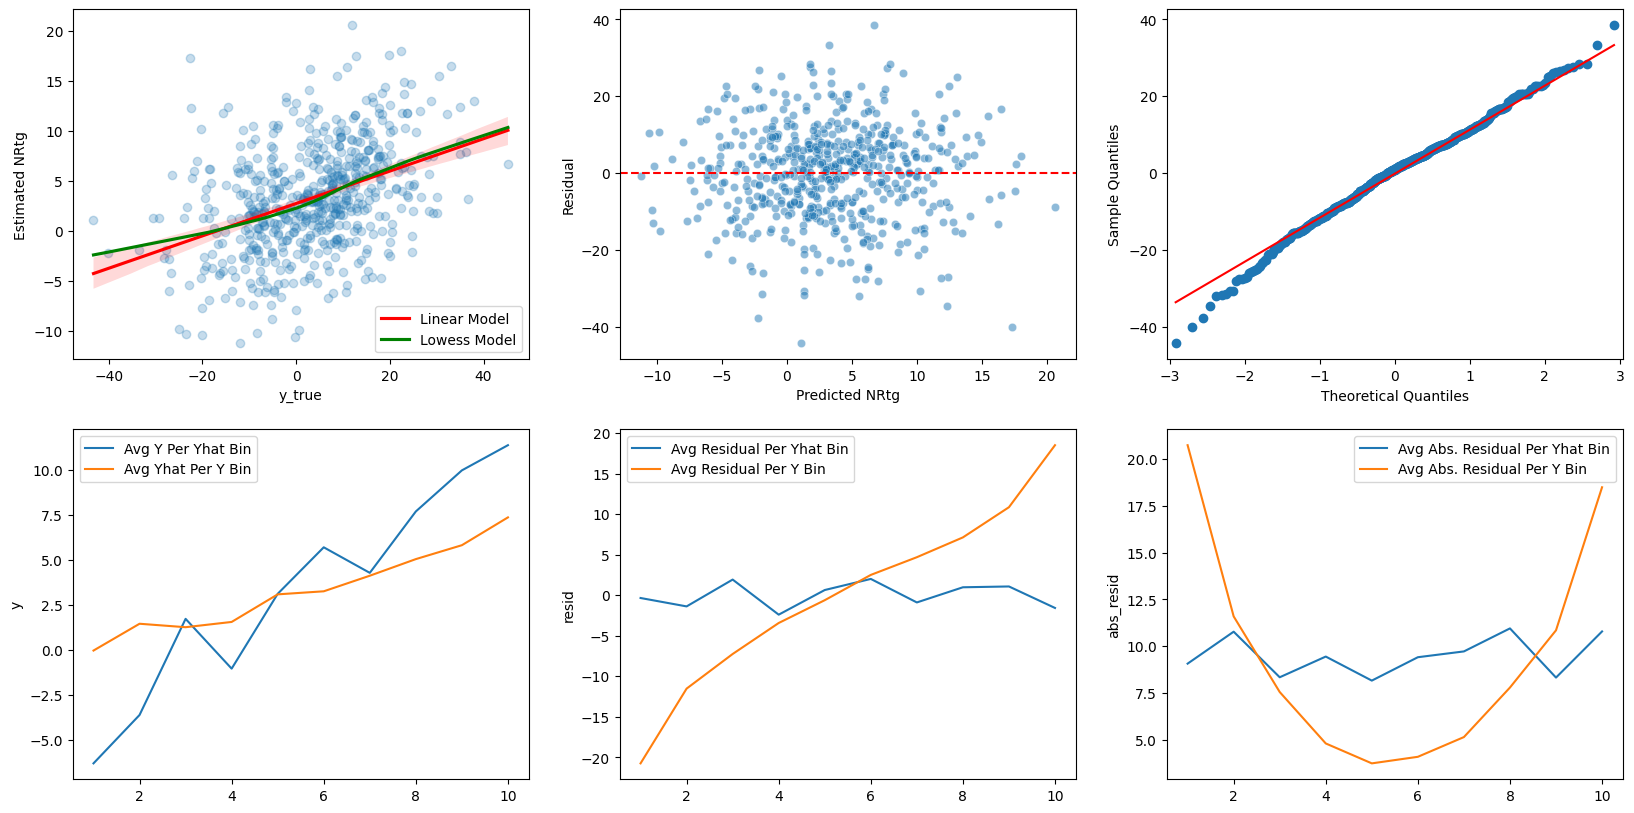

In [6]:
comp_eff = CompositeEffort(X=X, y=y)
model = comp_eff.estimate_stage1_model()

/Users/samuelluxenberg/Library/CloudStorage/OneDrive-Personal/GitHub/nba_hustle_sdg/nba_hustle_sdg/src/steps/model/model.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.X['COMPOSITE_EFFORT'] = effort_mat @ effort_vec


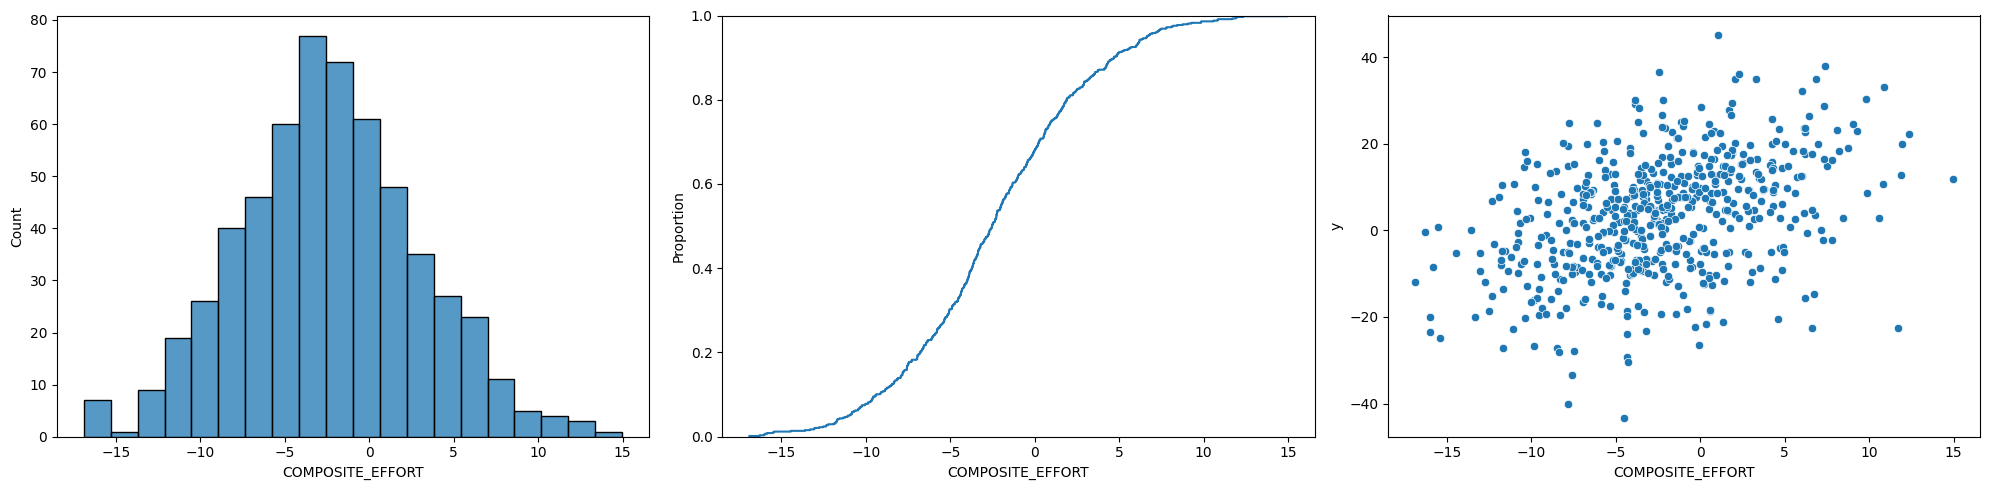

count    575.000000
mean      -2.359284
std        5.350828
min      -16.900085
0.1%     -16.548443
1%       -15.454237
5%       -10.970915
10%       -9.293633
20%       -6.774476
25%       -5.788882
30%       -5.056424
40%       -3.718243
50%       -2.535766
60%       -1.323113
70%        0.248720
75%        0.994090
80%        1.884690
90%        4.685569
95%        6.631251
99%       10.822938
99.9%     13.457588
max       14.963169
Name: COMPOSITE_EFFORT, dtype: float64


Pearson Correlation:  0.403, P-value:  0.00000
Spearman Correlation:  0.406, P-value:  0.00000
Kendall's Tau Correlation:  0.281, P-value:  0.00000


In [7]:
output_dir = os.path.join(DATA_DIR, 'stage1_effort')
df_stage1_effort = comp_eff.estimate_composite_effort(output_dir=output_dir)

In [8]:
df_stage1_effort.head(2)

,HOME_CONTESTED_SHOTS_2PT,HOME_DEF_BOXOUTS,HOME_DEF_LOOSE_BALLS_RECOVERED,HOME_CHARGES_DRAWN,HOME_DEFLECTIONS,HOME_OFF_LOOSE_BALLS_RECOVERED,HOME_OFF_BOXOUTS,HOME_SCREEN_ASSISTS,HOME_CONTESTED_SHOTS_3PT,AWAY_CONTESTED_SHOTS_2PT,AWAY_DEF_BOXOUTS,AWAY_DEF_LOOSE_BALLS_RECOVERED,AWAY_CHARGES_DRAWN,AWAY_DEFLECTIONS,AWAY_OFF_LOOSE_BALLS_RECOVERED,AWAY_OFF_BOXOUTS,AWAY_SCREEN_ASSISTS,AWAY_CONTESTED_SHOTS_3PT,COMPOSITE_EFFORT
0,19,2,2,2,16,2,0,10,15,15,6,1,0,16,0,0,9,12,-1.124029
1,30,11,2,1,22,1,3,18,33,35,11,2,1,18,5,2,3,36,3.276873


In [9]:
df_trans.shape, df_stage1_effort.shape

((575, 89), (575, 19))

In [13]:
df_m = pd.concat([df_trans, df_stage1_effort['COMPOSITE_EFFORT']], axis=1)

In [14]:
df_m.isna().sum()

SEASON_ID                         0
GAME_ID                           0
GAME_DATE                         0
AWAY_TEAM_ID                      0
HOME_TEAM_ID                      0
                                 ..
SCREEN_ASSISTS_DIFF               0
BOX_OUT_PLAYER_REBS_DIFF          0
OFF_LOOSE_BALLS_RECOVERED_DIFF    0
CONTESTED_SHOTS_3PT_DIFF          0
COMPOSITE_EFFORT                  0
Length: 90, dtype: int64

In [16]:
df_m.head(2)

,SEASON_ID,GAME_ID,GAME_DATE,AWAY_TEAM_ID,HOME_TEAM_ID,AWAY_TEAM_ABBREVIATION,HOME_TEAM_ABBREVIATION,AWAY_TEAM_NAME,HOME_TEAM_NAME,AWAY_FGM,HOME_FGM,AWAY_FGA,HOME_FGA,AWAY_FG3M,HOME_FG3M,AWAY_FG3A,HOME_FG3A,AWAY_FTM,HOME_FTM,AWAY_FTA,HOME_FTA,AWAY_OREB,HOME_OREB,AWAY_DREB,HOME_DREB,AWAY_AST,HOME_AST,AWAY_STL,HOME_STL,AWAY_BLK,HOME_BLK,AWAY_TOV,HOME_TOV,AWAY_PF,HOME_PF,AWAY_PTS,HOME_PTS,NEUTRAL_IND,AWAY_DEF_BOXOUTS,HOME_DEF_BOXOUTS,AWAY_CONTESTED_SHOTS,HOME_CONTESTED_SHOTS,AWAY_DEFLECTIONS,HOME_DEFLECTIONS,AWAY_CHARGES_DRAWN,HOME_CHARGES_DRAWN,AWAY_DEF_LOOSE_BALLS_RECOVERED,HOME_DEF_LOOSE_BALLS_RECOVERED,AWAY_SCREEN_AST_PTS,HOME_SCREEN_AST_PTS,AWAY_OFF_BOXOUTS,HOME_OFF_BOXOUTS,AWAY_BOX_OUT_PLAYER_TEAM_REBS,HOME_BOX_OUT_PLAYER_TEAM_REBS,AWAY_BOX_OUTS,HOME_BOX_OUTS,AWAY_BOX_OUT_PLAYER_REBS,HOME_BOX_OUT_PLAYER_REBS,AWAY_SCREEN_ASSISTS,HOME_SCREEN_ASSISTS,AWAY_LOOSE_BALLS_RECOVERED,HOME_LOOSE_BALLS_RECOVERED,AWAY_CONTESTED_SHOTS_3PT,HOME_CONTESTED_SHOTS_3PT,AWAY_CONTESTED_SHOTS_2PT,HOME_CONTESTED_SHOTS_2PT,AWAY_OFF_LOOSE_BALLS_RECOVERED,HOME_OFF_LOOSE_BALLS_RECOVERED,HOME_POSS,AWAY_POSS,HOME_ORtg,AWAY_ORtg,HOME_NRtg,AWAY_NRtg,SCREEN_AST_PTS_DIFF,DEFLECTIONS_DIFF,CONTESTED_SHOTS_DIFF,DEF_BOXOUTS_DIFF,CONTESTED_SHOTS_2PT_DIFF,BOX_OUT_PLAYER_TEAM_REBS_DIFF,CHARGES_DRAWN_DIFF,LOOSE_BALLS_RECOVERED_DIFF,OFF_BOXOUTS_DIFF,BOX_OUTS_DIFF,DEF_LOOSE_BALLS_RECOVERED_DIFF,SCREEN_ASSISTS_DIFF,BOX_OUT_PLAYER_REBS_DIFF,OFF_LOOSE_BALLS_RECOVERED_DIFF,CONTESTED_SHOTS_3PT_DIFF,COMPOSITE_EFFORT
0,22022,22200001,2022-10-18,1610612755,1610612738,PHI,BOS,Philadelphia 76ers,Boston Celtics,40,46,80,82,13,12,34,35,24,22,28,28,4,6,27,30,16,24,8,8,3,3,14,11,25,24,117,126,0,6,2,27,34,16,16,0,2,1,2,19,22,0,0,6,2,6,2,4,0,9,10,1,4,12,15,15,19,0,2,99.32,102.32,126.862666,114.347146,12.515520,-12.515520,3,0,7,-4,4,-4,2,3,0,-4,1,1,-4,2,3,-1.124029
1,22022,22200002,2022-10-18,1610612747,1610612744,LAL,GSW,Los Angeles Lakers,Golden State Warriors,40,45,94,99,10,16,40,45,19,17,25,23,9,11,39,37,23,31,12,11,4,4,22,18,18,23,109,123,0,11,11,71,63,18,22,1,1,2,2,8,43,2,3,13,12,13,14,7,6,3,18,7,3,36,33,35,30,5,1,116.12,118.00,105.924905,92.372881,13.552024,-13.552024,35,4,-8,0,-5,-1,0,-4,1,1,0,15,-1,-4,-3,3.276873


In [64]:
def create_four_factors(df: pd.DataFrame) -> pd.DataFrame:
    # EFG_PCT = (FGM + 0.5 x 3PM) / FGA
    df['HOME_EFG_PCT'] = (df['HOME_FGM']+.5*df['HOME_FG3M'])/df['HOME_FGA']
    df['AWAY_EFG_PCT'] = (df['AWAY_FGM']+.5*df['AWAY_FG3M'])/df['AWAY_FGA']
    df['EFG_PCT_DIFF'] = df['HOME_EFG_PCT'] - df['AWAY_EFG_PCT']

    # FTA_RATE = FTA / FGA
    df['HOME_FTA_RATE'] = df['HOME_FTA']/df['HOME_FGA']
    df['AWAY_FTA_RATE'] = df['AWAY_FTA']/df['AWAY_FGA']
    df['FTA_RATE_DIFF'] = df['HOME_FTA_RATE'] - df['AWAY_FTA_RATE']

    # TM_TOV_PCT = TOV / POSS
    df['HOME_TOV_PCT'] = df['HOME_TOV']/df['HOME_POSS']
    df['AWAY_TOV_PCT'] = df['AWAY_TOV']/df['AWAY_POSS']
    df['TOV_PCT_DIFF'] = df['HOME_TOV_PCT'] - df['AWAY_TOV_PCT']

    # OREB_PCT = OREB / (OREB + Opp DREB) - technically need available rebounds, but good enough for now...
    df['HOME_OREB_PCT'] = df['HOME_OREB']/(df['HOME_OREB'] + df['AWAY_DREB'])
    df['AWAY_OREB_PCT'] = df['AWAY_OREB']/(df['AWAY_OREB'] + df['HOME_DREB'])
    df['OREB_PCT_DIFF'] = df['HOME_OREB_PCT'] - df['AWAY_OREB_PCT']
    

    return df

In [65]:
df_m2 = create_four_factors(df=df_m)

In [19]:
df_m2.head()

,SEASON_ID,GAME_ID,GAME_DATE,AWAY_TEAM_ID,HOME_TEAM_ID,AWAY_TEAM_ABBREVIATION,HOME_TEAM_ABBREVIATION,AWAY_TEAM_NAME,HOME_TEAM_NAME,AWAY_FGM,HOME_FGM,AWAY_FGA,HOME_FGA,AWAY_FG3M,HOME_FG3M,AWAY_FG3A,HOME_FG3A,AWAY_FTM,HOME_FTM,AWAY_FTA,HOME_FTA,AWAY_OREB,HOME_OREB,AWAY_DREB,HOME_DREB,AWAY_AST,HOME_AST,AWAY_STL,HOME_STL,AWAY_BLK,HOME_BLK,AWAY_TOV,HOME_TOV,AWAY_PF,HOME_PF,AWAY_PTS,HOME_PTS,NEUTRAL_IND,AWAY_DEF_BOXOUTS,HOME_DEF_BOXOUTS,AWAY_CONTESTED_SHOTS,HOME_CONTESTED_SHOTS,AWAY_DEFLECTIONS,HOME_DEFLECTIONS,AWAY_CHARGES_DRAWN,HOME_CHARGES_DRAWN,AWAY_DEF_LOOSE_BALLS_RECOVERED,HOME_DEF_LOOSE_BALLS_RECOVERED,AWAY_SCREEN_AST_PTS,HOME_SCREEN_AST_PTS,AWAY_OFF_BOXOUTS,HOME_OFF_BOXOUTS,AWAY_BOX_OUT_PLAYER_TEAM_REBS,HOME_BOX_OUT_PLAYER_TEAM_REBS,AWAY_BOX_OUTS,HOME_BOX_OUTS,AWAY_BOX_OUT_PLAYER_REBS,HOME_BOX_OUT_PLAYER_REBS,AWAY_SCREEN_ASSISTS,HOME_SCREEN_ASSISTS,AWAY_LOOSE_BALLS_RECOVERED,HOME_LOOSE_BALLS_RECOVERED,AWAY_CONTESTED_SHOTS_3PT,HOME_CONTESTED_SHOTS_3PT,AWAY_CONTESTED_SHOTS_2PT,HOME_CONTESTED_SHOTS_2PT,AWAY_OFF_LOOSE_BALLS_RECOVERED,HOME_OFF_LOOSE_BALLS_RECOVERED,HOME_POSS,AWAY_POSS,HOME_ORtg,AWAY_ORtg,HOME_NRtg,AWAY_NRtg,SCREEN_AST_PTS_DIFF,DEFLECTIONS_DIFF,CONTESTED_SHOTS_DIFF,DEF_BOXOUTS_DIFF,CONTESTED_SHOTS_2PT_DIFF,BOX_OUT_PLAYER_TEAM_REBS_DIFF,CHARGES_DRAWN_DIFF,LOOSE_BALLS_RECOVERED_DIFF,OFF_BOXOUTS_DIFF,BOX_OUTS_DIFF,DEF_LOOSE_BALLS_RECOVERED_DIFF,SCREEN_ASSISTS_DIFF,BOX_OUT_PLAYER_REBS_DIFF,OFF_LOOSE_BALLS_RECOVERED_DIFF,CONTESTED_SHOTS_3PT_DIFF,COMPOSITE_EFFORT,HOME_EFG_PCT,AWAY_EFG_PCT,HOME_FTA_RATE,AWAY_FTA_RATE,HOME_TOV_PCT,AWAY_TOV_PCT,HOME_OREB_PCT,AWAY_OREB_PCT
0,22022,22200001,2022-10-18,1610612755,1610612738,PHI,BOS,Philadelphia 76ers,Boston Celtics,40,46,80,82,13,12,34,35,24,22,28,28,4,6,27,30,16,24,8,8,3,3,14,11,25,24,117,126,0,6,2,27,34,16,16,0,2,1,2,19,22,0,0,6,2,6,2,4,0,9,10,1,4,12,15,15,19,0,2,99.32,102.32,126.862666,114.347146,12.515520,-12.515520,3,0,7,-4,4,-4,2,3,0,-4,1,1,-4,2,3,-1.124029,0.634146,0.581250,0.341463,0.350000,0.110753,0.136826,0.181818,0.117647
1,22022,22200002,2022-10-18,1610612747,1610612744,LAL,GSW,Los Angeles Lakers,Golden State Warriors,40,45,94,99,10,16,40,45,19,17,25,23,9,11,39,37,23,31,12,11,4,4,22,18,18,23,109,123,0,11,11,71,63,18,22,1,1,2,2,8,43,2,3,13,12,13,14,7,6,3,18,7,3,36,33,35,30,5,1,116.12,118.00,105.924905,92.372881,13.552024,-13.552024,35,4,-8,0,-5,-1,0,-4,1,1,0,15,-1,-4,-3,3.276873,0.535354,0.478723,0.232323,0.265957,0.155012,0.186441,0.220000,0.195652
2,22022,22200003,2022-10-19,1610612753,1610612765,ORL,DET,Orlando Magic,Detroit Pistons,42,40,86,94,11,14,30,38,14,19,19,24,10,12,38,29,21,31,5,11,5,4,18,13,24,21,109,113,0,12,11,60,59,11,15,0,0,1,4,26,19,2,1,11,10,14,12,6,4,10,8,6,8,26,19,34,40,5,4,105.56,102.36,107.048124,106.486909,0.561215,-0.561215,-7,4,-1,-1,6,-1,0,2,-1,-2,3,-2,-2,-1,-7,0.175294,0.500000,0.552326,0.255319,0.220930,0.123153,0.175850,0.240000,0.256410
3,22022,22200004,2022-10-19,1610612764,1610612754,WAS,IND,Washington Wizards,Indiana Pacers,42,39,92,97,11,15,31,42,19,14,24,21,14,12,39,30,21,21,5,7,10,5,17,15,19,20,114,107,0,11,5,67,62,14,12,0,1,2,2,20,17,2,3,13,7,13,8,10,3,9,8,5,5,31,21,36,41,3,3,109.24,105.56,97.949469,107.995453,-10.045984,10.045984,-3,-2,-5,-6,5,-6,1,0,1,-5,0,-1,-7,0,-10,-5.898219,0.479381,0.516304,0.216495,0.260870,0.137312,0.161046,0.235294,0.318182
4,22022,22200005,2022-10-19,1610612745,1610612737,HOU,ATL,Houston Rockets,Atlanta Hawks,42,45,98,90,9,7,35,25,14,20,15,24,15,4,39,34,25,30,4,12,3,5,16,9,20,18,107,117,0,11,8,54,67,11,16,0,1,2,5,26,27,0,1,8,4,11,9,1,1,11,13,8,6,17,28,37,39,6,1,105.56,105.60,110.837438,101.325758,9.511681,-9.511681,1,5,13,-3,2,-4,1,-2,1,-2,3,2,0,-5,11,2.233825,0.538889,0.474490,0.266667,0.153061,0.085260,0.151515,0.093023,0.306122


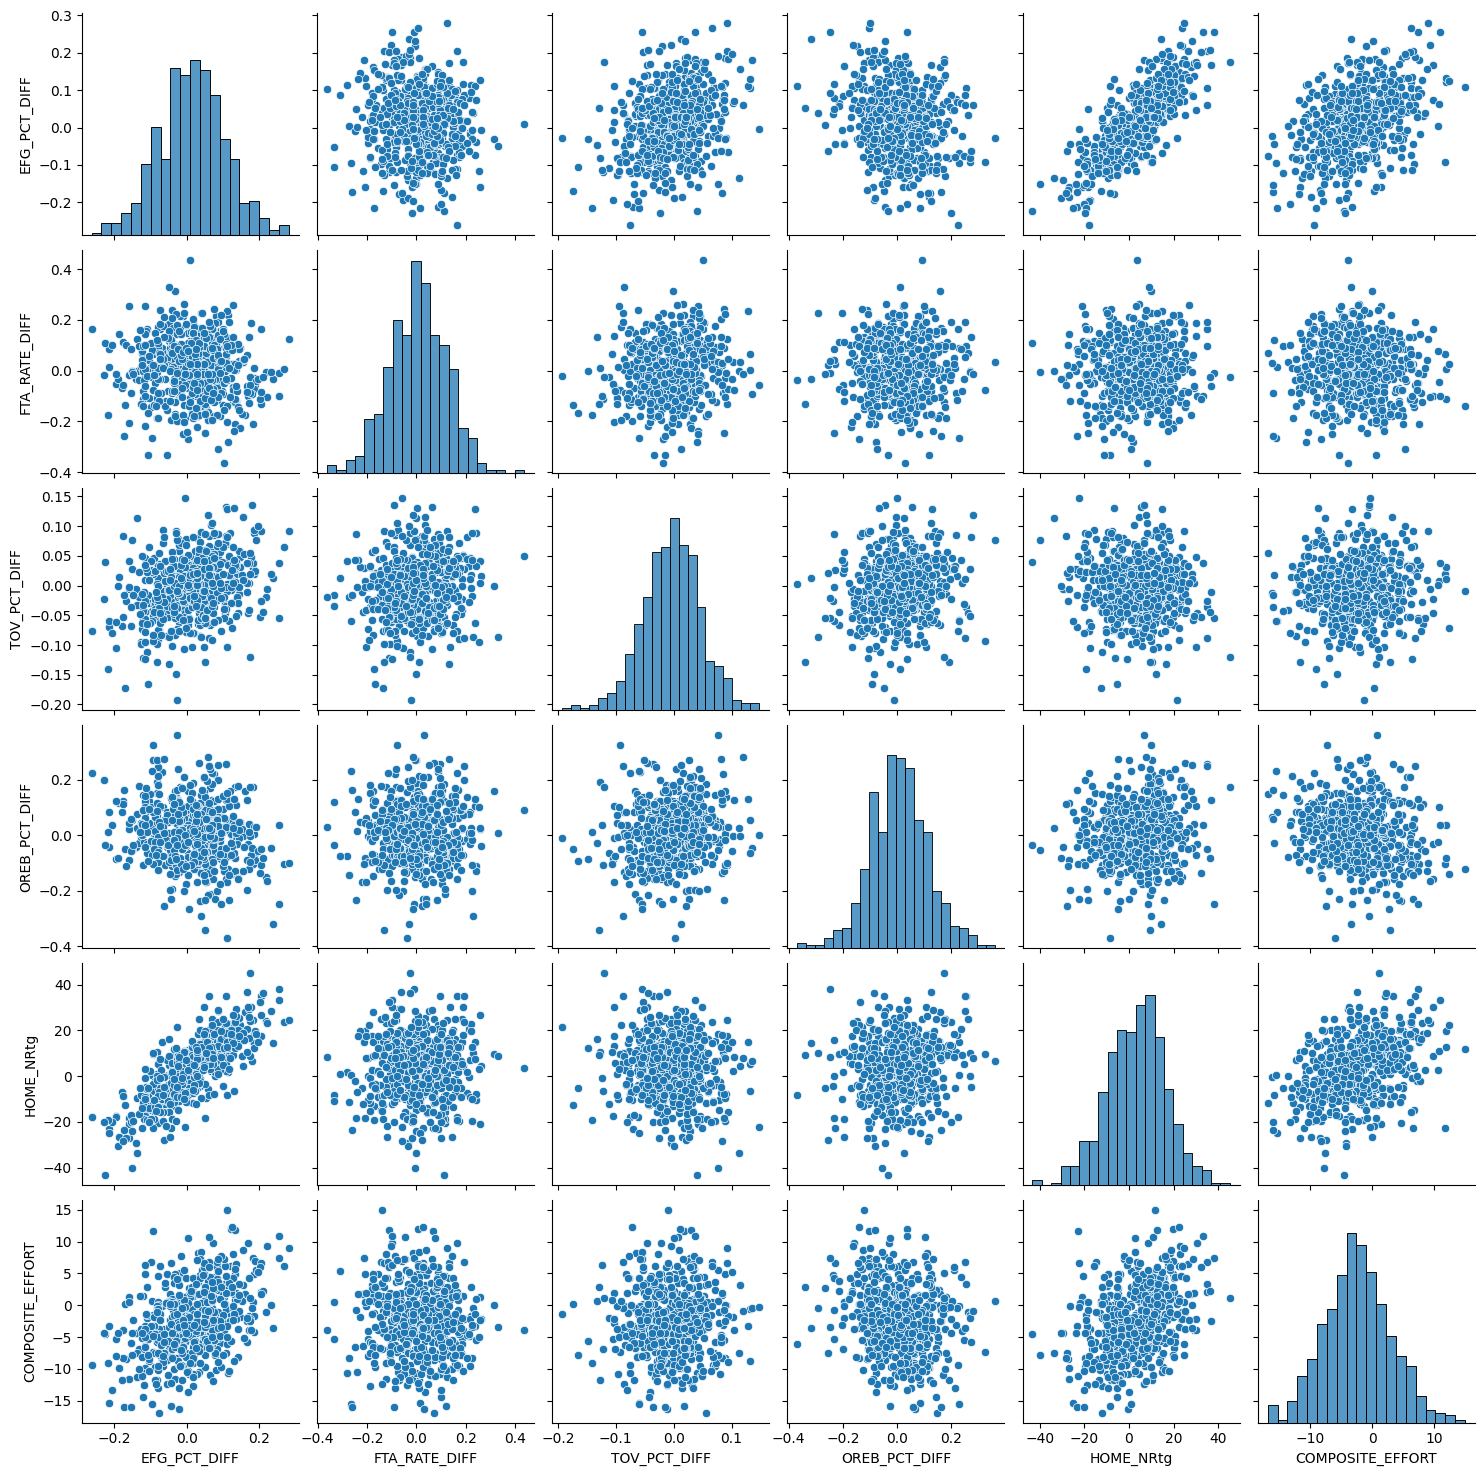

In [67]:
four_factors = ['EFG_PCT','FTA_RATE','TOV_PCT','OREB_PCT']
diff_ff = [f"{factor}_DIFF" for factor in four_factors]
sns.pairplot(df_m2[diff_ff + ['HOME_NRtg'] + ['COMPOSITE_EFFORT']])

In [59]:

home_ff = [f"HOME_{factor}" for factor in four_factors]
away_ff = [f"AWAY_{factor}" for factor in four_factors]
X_home_stage2 = df_m2[home_ff + ['COMPOSITE_EFFORT']]
X_away_stage2 = df_m2[away_ff + ['COMPOSITE_EFFORT']]
X_home_stage2.columns = X_home_stage2.columns.str.replace('HOME_','')
X_away_stage2.columns = X_away_stage2.columns.str.replace('AWAY_','')
X_stage2 = pd.concat([X_home_stage2, X_away_stage2], ignore_index=True)

In [60]:
X_stage2.head(2)

,EFG_PCT,FTA_RATE,TOV_PCT,OREB_PCT,COMPOSITE_EFFORT
0,0.634146,0.341463,0.110753,0.181818,-1.124029
1,0.535354,0.232323,0.155012,0.220000,3.276873


In [61]:
X_stage2.shape

(1150, 5)

In [63]:
X_stage2_norm = (X_stage2 - X_stage2.mean())/X_stage2.std()
X1_stage2_norm = sm.add_constant(X_stage2_norm)
X1_stage2 = sm.add_constant(X_stage2)
reg_stage2_norm = sm.OLS(endog=y_new, exog=X1_stage2_norm).fit()
reg_stage2 = sm.OLS(endog=y_new, exog=X1_stage2).fit()
print(reg_stage2_norm.summary())
print(reg_stage2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     156.1
Date:                Sun, 31 Aug 2025   Prob (F-statistic):          1.75e-126
Time:                        18:21:06   Log-Likelihood:                -4340.7
No. Observations:                1150   AIC:                             8693.
Df Residuals:                    1144   BIC:                             8724.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.331e-16      0.312  

In [57]:
for factor in four_factors: 
    reg_ff = sm.OLS(endog=X1_stage2['COMPOSITE_EFFORT'], exog=X1_stage2[['const',factor]]).fit()
    print(reg_ff.summary())

                            OLS Regression Results                            
Dep. Variable:       COMPOSITE_EFFORT   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3347
Date:                Sun, 31 Aug 2025   Prob (F-statistic):              0.563
Time:                        18:18:46   Log-Likelihood:                -3559.4
No. Observations:                1150   AIC:                             7123.
Df Residuals:                    1148   BIC:                             7133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1180      1.321     -2.360      0.0

In [68]:
# Diff Models
X_diff_stage2 = df_m2[diff_ff + ['COMPOSITE_EFFORT']]
X1_diff_stage2 = sm.add_constant(X_diff_stage2)
reg_diff_stage2 = sm.OLS(endog=df_m2['HOME_NRtg'], exog=X1_diff_stage2).fit()
print(reg_diff_stage2.summary())


                            OLS Regression Results                            
Dep. Variable:              HOME_NRtg   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1922.
Date:                Sun, 31 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:29:54   Log-Likelihood:                -1473.6
No. Observations:                 575   AIC:                             2959.
Df Residuals:                     569   BIC:                             2985.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3554      0.156  

In [53]:
four_factors

['EFG_PCT', 'FTA_RATE', 'TOV_PCT', 'OREB_PCT']